In [4]:
import torch
from src.quadtree import QuadTree
from src.utils.data import loadData

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
data, _ = loadData(100)

learning_rate = 1e-2
teacher_args = {
    "optimizer_lr": learning_rate,
    "epochs": 200,
    "times": 10,
    "alpha": 5,
    "beta": 10
}
un_args = {
    "N": 100,
    "M": 10000 - 1,
    "epsilon": 0.15
}
student_args = {
    "optimizer_lr": 1e-3,
    "epochs": 30000,
}

quadtree = QuadTree(40, data, teacher_args, un_args, student_args)
break
quadtree.create_tree(save_path_prefix="models/squares/100/class", plot=True)

Loading data...
Data loaded.


SyntaxError: 'break' outside loop (2346255467.py, line 28)

In [2]:
device

'cpu'

In [5]:
# Print a student prediction both using the student model from training
# and the student model loaded from config. The two outputs should be equal.
query = torch.tensor([[4., 2.], [2., 0.]]).to(device)

pred_trained = quadtree.root.student(query)
print(pred_trained)

# Recreate the student mddel from config.
node = QuadTree.Node(quadtree.root.data, "", quadtree)
node.create_student_from_config("models/squares/100/class0_student_config.pt")
pred_config = node.student(query)
print(pred_config)

print("Predictions are " + "equal." if torch.equal(pred_trained, pred_config) else "NOT equal.")

TypeError: 'NoneType' object is not callable

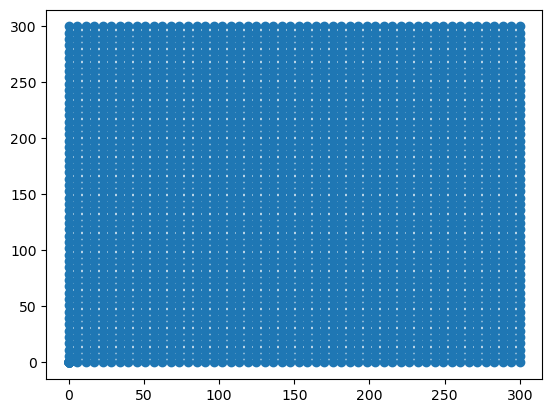

In [20]:
import numpy as np
import matplotlib.pyplot as plt

nop = 3000
random_p = torch.zeros(nop, 2)
x_lim = [0,300]
y_lim = [0,300]
num = int(np.sqrt(nop))
for i, x in enumerate(np.linspace(x_lim[0],x_lim[1], num)):
    for j, y in enumerate(np.linspace(y_lim[0],y_lim[1], num)):
        random_p[i*num+j] = torch.Tensor([x, y])
 
infer_points = random_p.to(device)
plt.scatter(infer_points[:,0], infer_points[:,1])

In [18]:
infer_points.shape

torch.Size([1000, 2])

In [21]:
num_of_correct_predictions = 0

qp = infer_points
for query_point in qp:
    pred = quadtree.query(query_point)
    brute_force = quadtree.root.query(query_point)
    # print(pred)
    # print(brute_force)
    if(np.array_equal(pred, brute_force)):
        num_of_correct_predictions += 1
 
print(f"The percentage of correct predictions is {(num_of_correct_predictions / len(infer_points)) * 100:.2f}%")

The percentage of correct predictions is 100.00%


In [16]:
query = torch.tensor([[4., 2.], [2., 0.], [0, 30], [45, 89], [12, 91],])
query = infer_points
for query_point in query:
    pred = quadtree.query(query_point)
    brute_force = quadtree.root.query(query_point)
    print(pred)
    print(brute_force)

[14.         27.          3.          0.63457281]
[14.         27.          3.          0.63457281]
[14.         27.          3.          0.63457281]
[14.         27.          3.          0.63457281]
[14.         27.          3.          0.63457281]
[14.         27.          3.          0.63457281]
[14.         27.          3.          0.63457281]
[14.         27.          3.          0.63457281]
[ 7.         50.          1.          0.37365135]
[ 7.         50.          1.          0.37365135]
[ 7.         50.          1.          0.37365135]
[ 7.         50.          1.          0.37365135]
[ 7.         50.          1.          0.37365135]
[ 7.         50.          1.          0.37365135]
[19.         56.          1.          0.23194531]
[19.         56.          1.          0.23194531]
[11.         97.          2.          0.56883575]
[11.         97.          2.          0.56883575]
[11.         97.          2.          0.56883575]
[11.         97.          2.          0.56883575]


KeyboardInterrupt: 

In [6]:
device = 'cpu'

In [7]:
import numpy as np
query = torch.tensor([[4., 2.], [2., 0.], [0, 30], [45, 89], [12, 91]])

# Build tree from config
quadtree2 = QuadTree(40, data, teacher_args, un_args, student_args)
quadtree2.root.create_student_from_config("models/squares/100/class_student_config.pt")
teacher_results = np.load("models/squares/100/class0_teacher_training_results.npy", allow_pickle=True)
quadtree2.root.best_z = teacher_results.item()["best_z"]
quadtree2.root.divide()

for query_point in query:
    pred = quadtree2.query(query_point)
    brute_force = quadtree2.root.query(query_point)
    print(pred)
    print(brute_force)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat2 in method wrapper_CUDA_mm)